In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
%matplotlib inline

In [25]:
def loadImg(rawImgPath):
    img = imread(rawImgPath)
    return img
    
ambient = loadImg('./lamp/lamp_ambient.tif')
flash = loadImg('./lamp/lamp_flash.tif')
print(ambient.shape)
print(ambient.dtype)

[94 62  5]
uint8


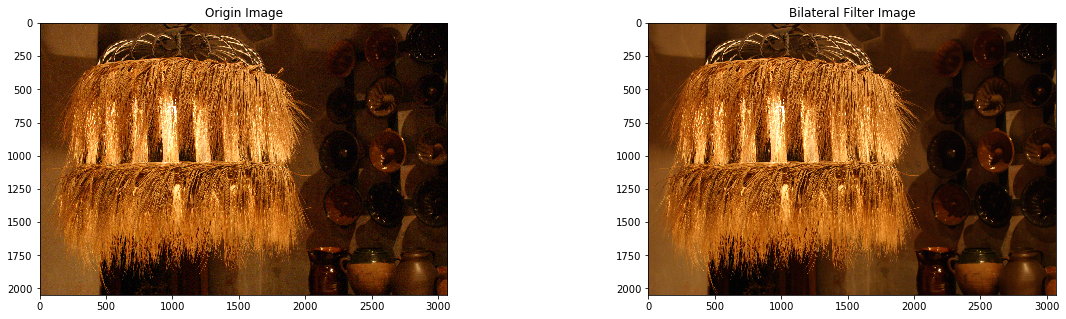

In [10]:
amibent_base = cv2.bilateralFilter(ambient,-1,20,3)

fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Origin Image')
plt.imshow(ambient)
plt.subplot(1,2,2)
plt.title('Bilateral Filter Image')
plt.imshow(amibent_base)
plt.show()

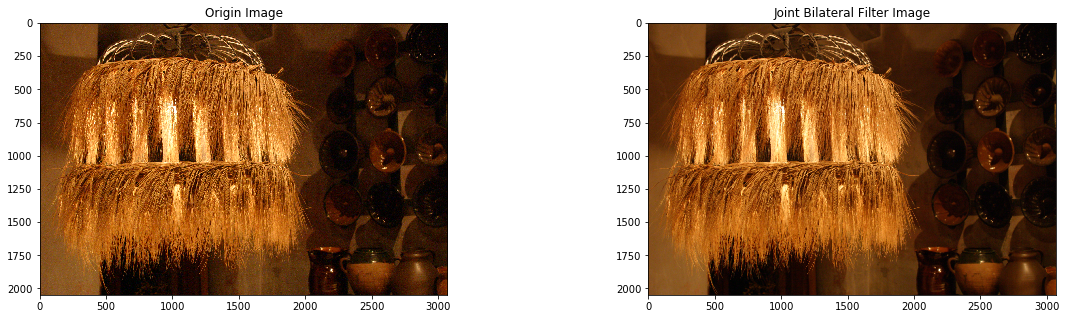

In [14]:
joint = cv2.ximgproc.jointBilateralFilter(flash,ambient,-1,20,3)

fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Origin Image')
plt.imshow(ambient)
plt.subplot(1,2,2)
plt.title('Joint Bilateral Filter Image')
plt.imshow(joint)
plt.show()

In [17]:
flash_base = cv2.bilateralFilter(flash,-1,20,3)

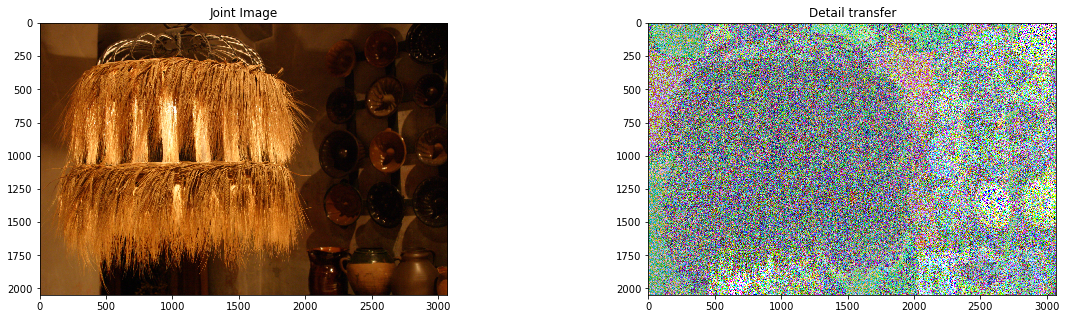

In [21]:
e = 0.001
ratio = (flash + e)/(flash_base + e)
amibent_detail = joint * ratio

fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Joint Image')
plt.imshow(joint)
plt.subplot(1,2,2)
plt.title('Detail transfer')
plt.imshow(amibent_detail)
plt.show()

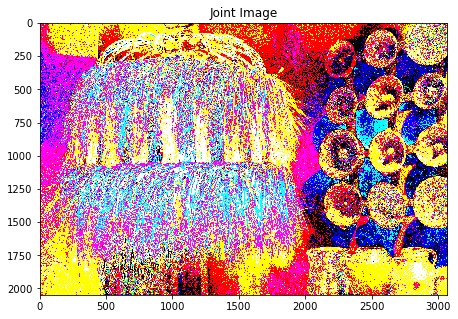

In [37]:
#compute mask
t_shad = 50

mask = flash-ambient
mask[mask < t_shad] = 0
mask[mask >= t_shad] = 255

fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Joint Image')
plt.imshow(mask)
plt.show()

 















end